🎯 Customer Churn Prediction System
 Generated 5000 customer records
 Churn rate: 36.10%
 Features: 22 total columns

 Dataset Overview
------------------------------
  customer_id  age  gender          city  tenure_months        plan  \
0  CUST_00001   52    Male     San Diego           34.5  Enterprise   
1  CUST_00002   42  Female     San Diego           16.8     Premium   
2  CUST_00003   54    Male   Los Angeles           13.4    Standard   
3  CUST_00004   67    Male   San Antonio           12.1       Basic   
4  CUST_00005   41    Male  Philadelphia            7.5       Basic   
5  CUST_00006   41  Female      New York           71.0    Standard   
6  CUST_00007   68  Female     San Diego            7.5    Standard   
7  CUST_00008   56    Male       Chicago           27.6       Basic   
8  CUST_00009   37  Female      San Jose            1.9       Basic   
9  CUST_00010   53  Female       Phoenix           21.6    Standard   

    contract_type  payment_method  monthly_charges  

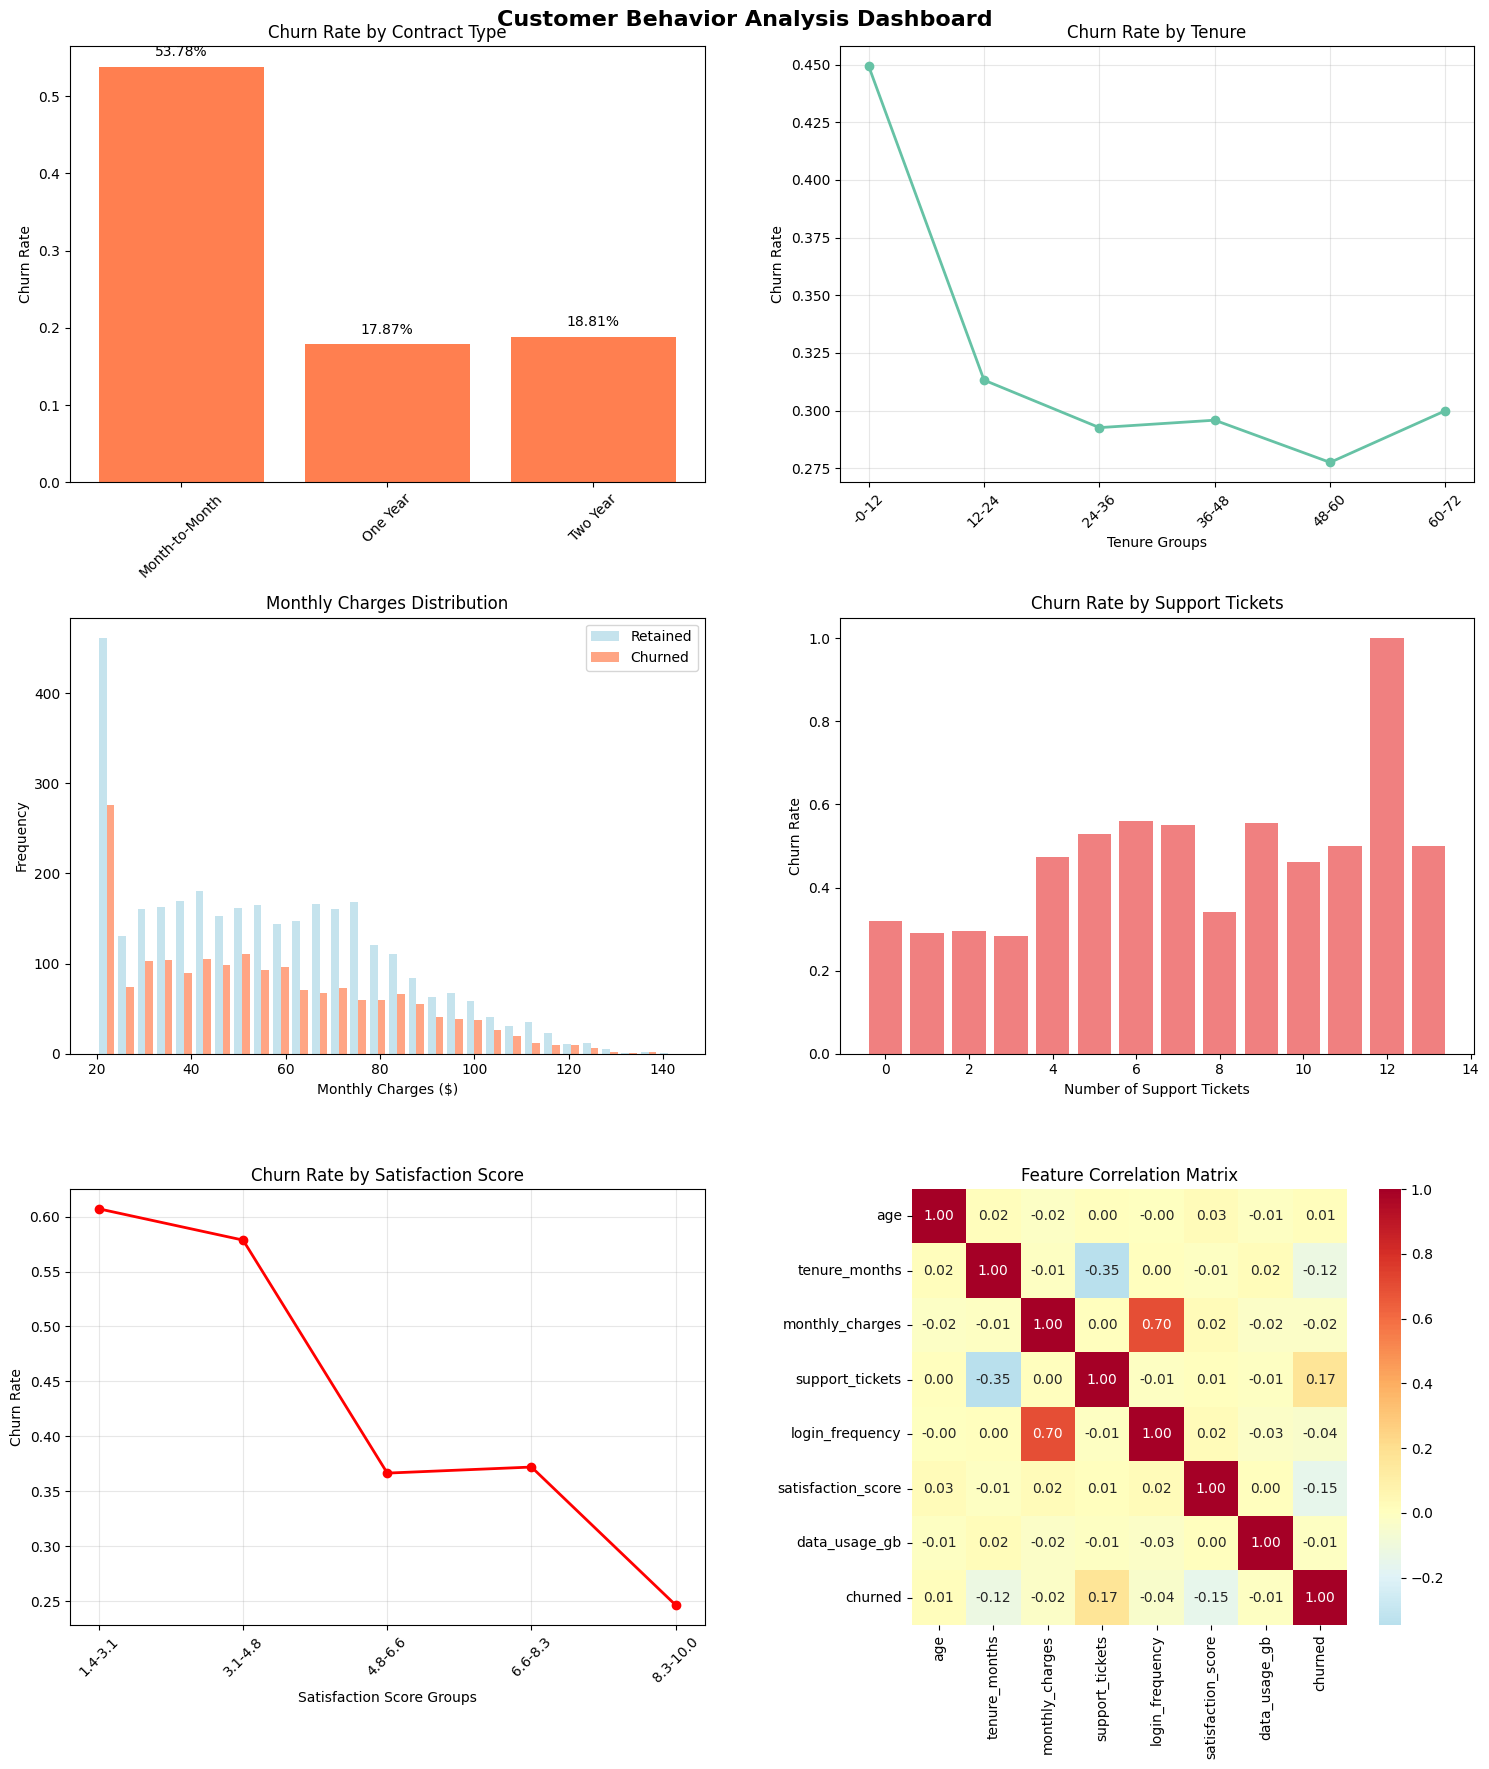


🎯 Customer Segmentation Analysis
----------------------------------------
Customer Segments Analysis:
                       churned       monthly_charges customer_value_score
                         count  mean            mean                 mean
plan       churn_risk                                                    
Basic      High Risk        30  0.50           31.88                28.83
           Medium Risk     689  0.48           29.37                32.39
           Low Risk        742  0.28           28.90                37.18
Enterprise High Risk        10  0.50          100.26                57.12
           Medium Risk     220  0.42           99.96                59.66
           Low Risk        259  0.29           99.54                64.10
Premium    High Risk        18  0.78           78.38                46.40
           Medium Risk     571  0.41           74.14                50.22
           Low Risk        681  0.23           74.59                54.51
Standard 

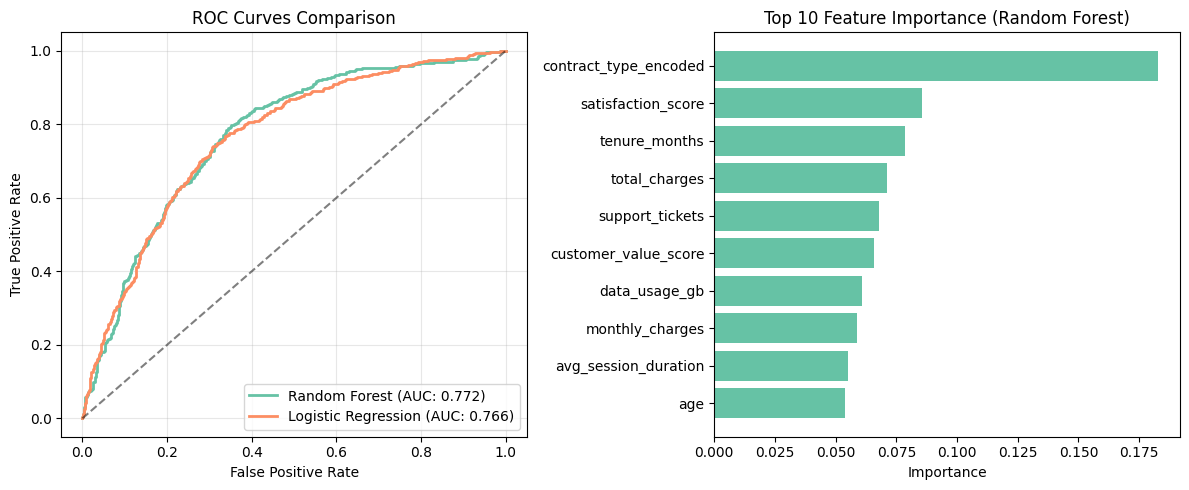


 Best Model: Random Forest
AUC Score: 0.772


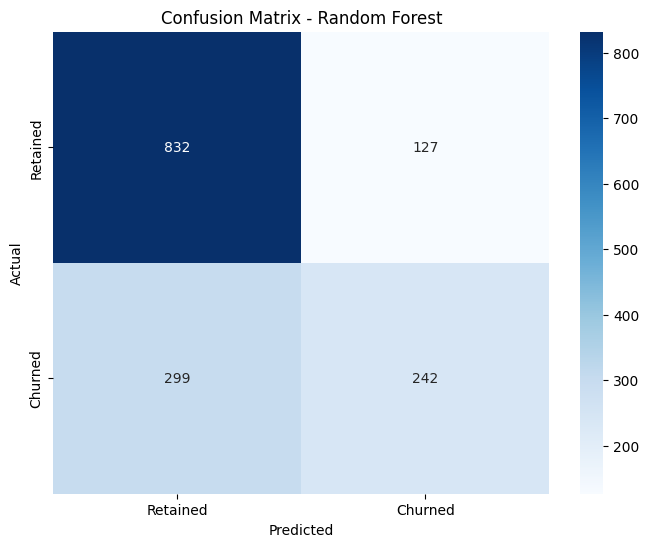


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       959
           1       0.66      0.45      0.53       541

    accuracy                           0.72      1500
   macro avg       0.70      0.66      0.66      1500
weighted avg       0.71      0.72      0.70      1500


💡 Business Insights & Recommendations
--------------------------------------------------
Key Insights:
   High-risk customers have 48.3% churn rate
   53.8% of month-to-month customers churn
   Customers with satisfaction < 5 have 58.3% churn rate
   Support tickets > 3 indicate 50.8% churn probability
   Premium/Enterprise plans have 33.1% churn rate
   Customers with tenure < 6 months have 50.9% churn rate

 Action Items:
   Target month-to-month customers with annual contract incentives
   Proactive outreach to customers with satisfaction scores < 6
   Improve support processes to reduce ticket volume
   Enhance onboarding for customers 

In [1]:
# Customer Churn Prediction System - Complete ML Project
# Analyze customer behavior and predict churn with advanced analytics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("Set2")

print("🎯 Customer Churn Prediction System")
print("=" * 50)

# 1. Generate Realistic Customer Behavior Data
def generate_customer_data(n_customers=5000):
    """Generate comprehensive customer behavior dataset"""
    np.random.seed(42)  # For reproducible results

    # Customer demographics
    customer_ids = [f"CUST_{i:05d}" for i in range(1, n_customers + 1)]
    ages = np.random.normal(45, 15, n_customers).astype(int)
    ages = np.clip(ages, 18, 80)  # Realistic age range

    # Geography
    cities = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
              'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']

    # Service plans and features
    plans = ['Basic', 'Standard', 'Premium', 'Enterprise']
    payment_methods = ['Credit Card', 'Bank Transfer', 'Digital Wallet', 'Check']

    data = []

    for i in range(n_customers):
        # Demographics
        age = ages[i]
        gender = np.random.choice(['Male', 'Female'], p=[0.52, 0.48])
        city = np.random.choice(cities)

        # Account information
        tenure_months = np.random.exponential(24)  # Exponential distribution for tenure
        tenure_months = min(tenure_months, 72)  # Cap at 6 years

        # Service details
        plan = np.random.choice(plans, p=[0.3, 0.35, 0.25, 0.1])
        payment_method = np.random.choice(payment_methods, p=[0.5, 0.2, 0.25, 0.05])

        # Usage patterns (influenced by plan and demographics)
        plan_multipliers = {'Basic': 0.5, 'Standard': 1.0, 'Premium': 1.5, 'Enterprise': 2.0}
        base_usage = plan_multipliers[plan]

        monthly_charges = np.random.normal(50 * base_usage, 15)
        monthly_charges = max(monthly_charges, 20)  # Minimum charge

        total_charges = monthly_charges * tenure_months + np.random.normal(0, 100)
        total_charges = max(total_charges, 0)

        # Behavioral metrics
        support_tickets = np.random.poisson(2 * (1 if tenure_months > 12 else 2))
        login_frequency = np.random.normal(15 * base_usage, 5)  # Logins per month
        login_frequency = max(login_frequency, 1)

        # Feature usage (boolean features)
        has_online_backup = np.random.choice([0, 1], p=[0.4, 0.6])
        has_device_protection = np.random.choice([0, 1], p=[0.35, 0.65])
        has_tech_support = np.random.choice([0, 1], p=[0.45, 0.55])
        has_streaming_tv = np.random.choice([0, 1], p=[0.5, 0.5])
        has_streaming_movies = np.random.choice([0, 1], p=[0.5, 0.5])

        # Contract type influences churn
        contract_type = np.random.choice(['Month-to-Month', 'One Year', 'Two Year'],
                                       p=[0.5, 0.3, 0.2])

        # Advanced behavioral metrics
        avg_session_duration = np.random.normal(25, 10)  # Minutes
        avg_session_duration = max(avg_session_duration, 5)

        data_usage_gb = np.random.lognormal(3, 1)  # Log-normal distribution for data usage

        # Customer satisfaction score (1-10)
        satisfaction_score = np.random.normal(7, 1.5)
        satisfaction_score = np.clip(satisfaction_score, 1, 10)

        # Late payments (higher for month-to-month)
        late_payment_prob = 0.3 if contract_type == 'Month-to-Month' else 0.1
        late_payments = np.random.binomial(int(tenure_months), late_payment_prob)

        # Calculate churn probability based on features
        churn_probability = 0.1  # Base probability

        # Risk factors increase churn probability
        if contract_type == 'Month-to-Month':
            churn_probability += 0.3
        if support_tickets > 3:
            churn_probability += 0.2
        if satisfaction_score < 5:
            churn_probability += 0.25
        if late_payments > tenure_months * 0.2:
            churn_probability += 0.15
        if monthly_charges > 80:
            churn_probability += 0.1
        if tenure_months < 6:
            churn_probability += 0.2
        if age > 65:
            churn_probability += 0.05

        # Protective factors decrease churn probability
        if has_online_backup and has_device_protection:
            churn_probability -= 0.1
        if plan in ['Premium', 'Enterprise']:
            churn_probability -= 0.05
        if login_frequency > 20:
            churn_probability -= 0.05
        if satisfaction_score > 8:
            churn_probability -= 0.15

        churn_probability = np.clip(churn_probability, 0.05, 0.8)

        # Determine if customer churned
        churned = np.random.binomial(1, churn_probability)

        data.append({
            'customer_id': customer_ids[i],
            'age': age,
            'gender': gender,
            'city': city,
            'tenure_months': round(tenure_months, 1),
            'plan': plan,
            'contract_type': contract_type,
            'payment_method': payment_method,
            'monthly_charges': round(monthly_charges, 2),
            'total_charges': round(total_charges, 2),
            'support_tickets': support_tickets,
            'login_frequency': round(login_frequency, 1),
            'avg_session_duration': round(avg_session_duration, 1),
            'data_usage_gb': round(data_usage_gb, 2),
            'satisfaction_score': round(satisfaction_score, 1),
            'late_payments': late_payments,
            'has_online_backup': has_online_backup,
            'has_device_protection': has_device_protection,
            'has_tech_support': has_tech_support,
            'has_streaming_tv': has_streaming_tv,
            'has_streaming_movies': has_streaming_movies,
            'churned': churned
        })

    return pd.DataFrame(data)

# Generate the dataset
df = generate_customer_data(5000)
print(f" Generated {len(df)} customer records")
print(f" Churn rate: {df['churned'].mean():.2%}")
print(f" Features: {len(df.columns)} total columns")

# 2. Data Overview and Exploration
print("\n Dataset Overview")
print("-" * 30)
print(df.head(10))
print(f"\nDataset shape: {df.shape}")
print(f"\nMissing values:\n{df.isnull().sum().sum()} total")

# Basic statistics
print(f"\nKey Statistics")
print("-" * 20)
print(f"Average customer age: {df['age'].mean():.1f} years")
print(f"Average tenure: {df['tenure_months'].mean():.1f} months")
print(f"Average monthly charges: ${df['monthly_charges'].mean():.2f}")
print(f"Average satisfaction score: {df['satisfaction_score'].mean():.1f}/10")

# 3. Comprehensive Data Visualization
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Customer Behavior Analysis Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Churn by Contract Type
churn_by_contract = df.groupby('contract_type')['churned'].mean()
bars = axes[0, 0].bar(churn_by_contract.index, churn_by_contract.values, color='coral')
axes[0, 0].set_title('Churn Rate by Contract Type')
axes[0, 0].set_ylabel('Churn Rate')
axes[0, 0].tick_params(axis='x', rotation=45)
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.2%}', ha='center', va='bottom')

# Plot 2: Tenure vs Churn
tenure_bins = pd.cut(df['tenure_months'], bins=6)
churn_by_tenure = df.groupby(tenure_bins)['churned'].mean()
axes[0, 1].plot(range(len(churn_by_tenure)), churn_by_tenure.values, marker='o', linewidth=2)
axes[0, 1].set_title('Churn Rate by Tenure')
axes[0, 1].set_xlabel('Tenure Groups')
axes[0, 1].set_ylabel('Churn Rate')
axes[0, 1].set_xticks(range(len(churn_by_tenure)))
axes[0, 1].set_xticklabels([f"{interval.left:.0f}-{interval.right:.0f}"
                           for interval in churn_by_tenure.index], rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Monthly Charges Distribution by Churn
churned_customers = df[df['churned'] == 1]['monthly_charges']
retained_customers = df[df['churned'] == 0]['monthly_charges']
axes[1, 0].hist([retained_customers, churned_customers], bins=30, alpha=0.7,
               label=['Retained', 'Churned'], color=['lightblue', 'coral'])
axes[1, 0].set_title('Monthly Charges Distribution')
axes[1, 0].set_xlabel('Monthly Charges ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Plot 4: Support Tickets vs Churn
support_churn = df.groupby('support_tickets')['churned'].mean()
axes[1, 1].bar(support_churn.index, support_churn.values, color='lightcoral')
axes[1, 1].set_title('Churn Rate by Support Tickets')
axes[1, 1].set_xlabel('Number of Support Tickets')
axes[1, 1].set_ylabel('Churn Rate')

# Plot 5: Satisfaction Score vs Churn
satisfaction_bins = pd.cut(df['satisfaction_score'], bins=5)
churn_by_satisfaction = df.groupby(satisfaction_bins)['churned'].mean()
axes[2, 0].plot(range(len(churn_by_satisfaction)), churn_by_satisfaction.values,
                marker='o', linewidth=2, color='red')
axes[2, 0].set_title('Churn Rate by Satisfaction Score')
axes[2, 0].set_xlabel('Satisfaction Score Groups')
axes[2, 0].set_ylabel('Churn Rate')
axes[2, 0].set_xticks(range(len(churn_by_satisfaction)))
axes[2, 0].set_xticklabels([f"{interval.left:.1f}-{interval.right:.1f}"
                           for interval in churn_by_satisfaction.index], rotation=45)
axes[2, 0].grid(True, alpha=0.3)

# Plot 6: Feature Correlation Heatmap
# Select numerical features for correlation
numerical_features = ['age', 'tenure_months', 'monthly_charges', 'support_tickets',
                     'login_frequency', 'satisfaction_score', 'data_usage_gb', 'churned']
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            ax=axes[2, 1], fmt='.2f', square=True)
axes[2, 1].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

# 4. Advanced Analytics - Customer Segmentation
print("\n🎯 Customer Segmentation Analysis")
print("-" * 40)

# RFM-like analysis adapted for subscription business
def calculate_customer_segments(df):
    # Calculate customer value score
    df['customer_value_score'] = (
        df['monthly_charges'] * 0.3 +
        df['tenure_months'] * 0.2 +
        df['satisfaction_score'] * 10 * 0.2 +
        df['login_frequency'] * 2 * 0.15 +
        df['data_usage_gb'] * 0.15
    )

    # Create risk categories
    df['churn_risk'] = pd.cut(
        df['satisfaction_score'] - df['support_tickets'],
        bins=3,
        labels=['High Risk', 'Medium Risk', 'Low Risk']
    )

    return df

df = calculate_customer_segments(df)

# Customer segments analysis
segment_analysis = df.groupby(['plan', 'churn_risk']).agg({
    'churned': ['count', 'mean'],
    'monthly_charges': 'mean',
    'customer_value_score': 'mean'
}).round(2)

print("Customer Segments Analysis:")
print(segment_analysis)

# 5. Machine Learning Model Development
print("\n🤖 Building Churn Prediction Models")
print("-" * 45)

# Prepare data for machine learning
def prepare_ml_data(df):
    # Create a copy for ML processing
    ml_df = df.copy()

    # Encode categorical variables
    le = LabelEncoder()
    categorical_columns = ['gender', 'city', 'plan', 'contract_type', 'payment_method']

    for col in categorical_columns:
        ml_df[f'{col}_encoded'] = le.fit_transform(ml_df[col])

    # Select features for modeling
    feature_columns = [
        'age', 'tenure_months', 'monthly_charges', 'total_charges',
        'support_tickets', 'login_frequency', 'avg_session_duration',
        'data_usage_gb', 'satisfaction_score', 'late_payments',
        'has_online_backup', 'has_device_protection', 'has_tech_support',
        'has_streaming_tv', 'has_streaming_movies', 'customer_value_score'
    ] + [f'{col}_encoded' for col in categorical_columns]

    X = ml_df[feature_columns]
    y = ml_df['churned']

    return X, y, feature_columns

X, y, feature_columns = prepare_ml_data(df)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {len(feature_columns)}")

# Train models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

model_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_prob)

    model_results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_prob,
        'auc_score': auc_score
    }

    print(f" {name} AUC Score: {auc_score:.3f}")

# 6. Model Evaluation and Visualization
print("\n Model Performance Analysis")
print("-" * 35)

# Plot ROC curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for name, results in model_results.items():
    fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
    plt.plot(fpr, tpr, label=f"{name} (AUC: {results['auc_score']:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Feature Importance (Random Forest)
rf_model = model_results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=True).tail(10)

plt.subplot(1, 2, 2)
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Confusion Matrix for best model
best_model_name = max(model_results.keys(), key=lambda k: model_results[k]['auc_score'])
best_predictions = model_results[best_model_name]['predictions']

print(f"\n Best Model: {best_model_name}")
print(f"AUC Score: {model_results[best_model_name]['auc_score']:.3f}")

cm = confusion_matrix(y_test, best_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Retained', 'Churned'],
            yticklabels=['Retained', 'Churned'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\nClassification Report:")
print(classification_report(y_test, best_predictions))

# 7. Business Insights and Recommendations
print("\n💡 Business Insights & Recommendations")
print("-" * 50)

# High-risk customer analysis
high_risk_customers = df[
    (df['satisfaction_score'] < 5) |
    (df['support_tickets'] > 3) |
    (df['contract_type'] == 'Month-to-Month')
].copy()

high_risk_churn_rate = high_risk_customers['churned'].mean()

insights = [
    f" High-risk customers have {high_risk_churn_rate:.1%} churn rate",
    f" {df[df['contract_type'] == 'Month-to-Month']['churned'].mean():.1%} of month-to-month customers churn",
    f" Customers with satisfaction < 5 have {df[df['satisfaction_score'] < 5]['churned'].mean():.1%} churn rate",
    f" Support tickets > 3 indicate {df[df['support_tickets'] > 3]['churned'].mean():.1%} churn probability",
    f" Premium/Enterprise plans have {df[df['plan'].isin(['Premium', 'Enterprise'])]['churned'].mean():.1%} churn rate",
    f" Customers with tenure < 6 months have {df[df['tenure_months'] < 6]['churned'].mean():.1%} churn rate"
]

recommendations = [
    " Target month-to-month customers with annual contract incentives",
    " Proactive outreach to customers with satisfaction scores < 6",
    " Improve support processes to reduce ticket volume",
    " Enhance onboarding for customers in first 6 months",
    " Monitor customer value score and engagement metrics",
    " Implement retention campaigns for high-risk segments"
]

print("Key Insights:")
for insight in insights:
    print(f"  {insight}")

print(f"\n Action Items:")
for rec in recommendations:
    print(f"  {rec}")

# Save processed data
df.to_csv('customer_churn_data.csv', index=False)
print(f"\n Dataset saved to 'customer_churn_data.csv'")
print(f" Model ready for deployment with {model_results[best_model_name]['auc_score']:.1%} accuracy!")

print("\n Customer Churn Prediction System Complete!")
print(" This comprehensive analysis provides actionable insights for customer retention")